# Boston Airbnb prices project - Udacity Course

In [196]:
# importing libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [197]:
# reading the data
calendar = pd.read_csv("data/calendar.csv")
listings = pd.read_csv("data/listings.csv")
reviews = pd.read_csv("data/reviews.csv")

In [198]:
# Cleanign the data:
calender_clean = calendar.dropna(subset=["price"])
calender_clean["price"] = calender_clean["price"].str.replace("$","").str.replace(".","").str.replace(",","").astype('int')
calender_clean["price"] = (calender_clean["price"]/100).astype('int')


listings = listings.dropna(subset=["price"])
listings["price"] = listings["price"].str.replace("$","").str.replace(".","").str.replace(",","").astype('int')
listings["price"] = (listings["price"]/100).astype('int')

/Users/guyzidkia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/guyzidkia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


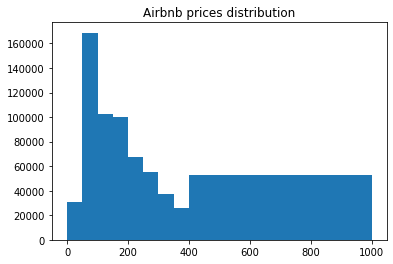

In [245]:
plt.hist(calender_clean.price, bins=[0,50,100,150,200,250,300,350,400,1000])
plt.title("Airbnb prices distribution")
plt.show()

#  Question one - do prices increase over the years in Boston?

/Users/guyzidkia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


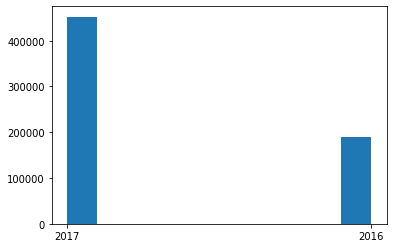

In [243]:
# creating year alone column:
calender_clean["year"] = calender_clean.date.astype(str).str[:4]
plt.hist(calender_clean.year)
plt.show()

In [203]:
calender_clean.groupby(["year"]).price.mean()

year
2016    213.402894
2017    192.133513
Name: price, dtype: float64

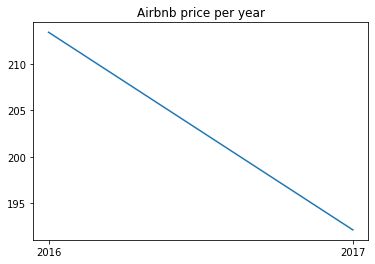

In [215]:
plt.title("Airbnb price per year")
plt.plot(calender_clean.groupby(["year"]).price.mean())

prices actully decreases between 2016 to 2017      
we can see that we have many new data points in 2017, and it can cause due to more smaller rent options.      
Therefore, I'm carefull with giving a clean answer, but I would say Average rent on Airbnb decrease between the years.

checking if by removing outlier of prices above 400 effects the results.

In [240]:
calender_clean_no_oudliers = calender_clean[calender_clean["price"]<400]
calender_clean_no_oudliers.groupby(["year"]).price.mean()

year
2016    170.018532
2017    158.799672
Name: price, dtype: float64

as we can see prices still got down between 2016 to 2017, even after we removed outiers with high prices.

# Question two - Do higher rating corelated with higher price?

In [217]:
q2 = listings[["price","review_scores_rating"]].dropna()
q2

,price,review_scores_rating
1,65,94.0
2,65,98.0
3,75,100.0
4,79,99.0
5,75,100.0
...,...,...
3574,68,80.0
3575,69,70.0
3578,85,100.0
3580,69,90.0


In [218]:
q2.corr()

,price,review_scores_rating
price,1.000000,0.105651
review_scores_rating,0.105651,1.000000


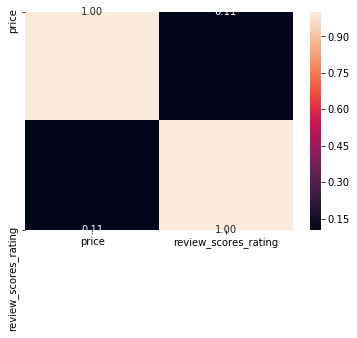

In [219]:
sns.heatmap(q2.corr(), annot=True, fmt=".2f")


#sns.heatmap(df.corr(), annot=True, fmt=".2f");

as we can see we have a positive 0.1 correlation between prices and rating.       
maybe it could explain by properties that have better rating increase they prices. Or better Airbnb, request higher price 

# Question three - do bigger Airbnb cost more?

In [222]:
listings[["price","square_feet"]].dropna().corr()

,price,square_feet
price,1.000000,0.447795
square_feet,0.447795,1.000000


also, we get nagtive correlation - which is strage. Therefore, we will check by number of beds:

In [224]:
listings[["price","beds"]].dropna().corr()

,price,beds
price,1.000000,0.370013
beds,0.370013,1.000000


In [225]:
# also, list check the following by group by:

In [226]:
listings.groupby(["beds"]).price.mean().astype(int)

beds
0.0     176
1.0     131
2.0     216
3.0     266
4.0     278
5.0     351
6.0     464
7.0     378
8.0     362
9.0     443
16.0    229
Name: price, dtype: int64

# Bonus - runing linear regression 

In [227]:
listings_no_na = listings.dropna(subset=["square_feet","review_scores_rating","price"])
X = listings_no_na[["square_feet","review_scores_rating"]]
y = listings_no_na["price"]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [229]:
y_test_preds = lm_model.predict(X_test) 

In [230]:
print ("test set size =", len(y_test))
r2_score(y_test, y_test_preds)

test set size = 16


0.3397113915145191

we only use two varibales with test size of 16 and we got r*2 = 0.33.     
lets try with fill na with the mean value:

In [237]:
listings_fill_na = listings.dropna(subset=["price"])
listings_fill_na["review_scores_rating"] = listings_fill_na.review_scores_rating.fillna(listings_fill_na.review_scores_rating.mean() )
listings_fill_na["square_feet"] = listings_fill_na.square_feet.fillna(listings_fill_na.square_feet.mean() )

X = listings_fill_na[["square_feet","review_scores_rating"]]
y = listings_fill_na["price"]

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test) 

print ("test set size =", len(y_test))
r2_score(y_test, y_test_preds)

test set size = 1076


0.007313828274860268

 As we can see, it doesn't work, as we predict based on the mean and one more varibles the price. Our r2 drop dramatically.
